# PCA

In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style('white')

# Illustration of PCA Concepts

## Create Random Data Set

np.dot -- Compute dot product of two arrays

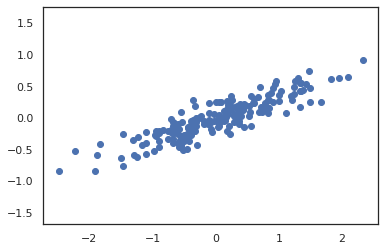

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Fit PCA to data

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

## Principal components and explained variance

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [6]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


## Plot principal components and explained variance

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2, color='black', shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

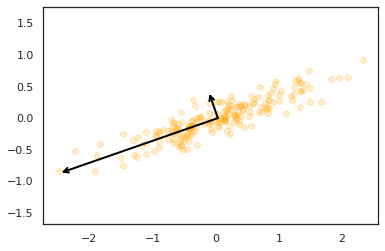

In [9]:
sns.set_style('white')
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, c="orange")
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

## PCA for Dimension Reduction

original shape:  (200, 2)
transformed shape: (200, 1)


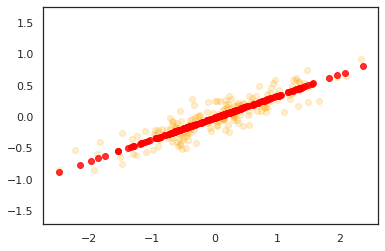

In [11]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, c='orange')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, c="red")
plt.axis('equal');

# Visualize Hnadwritten Digits 

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


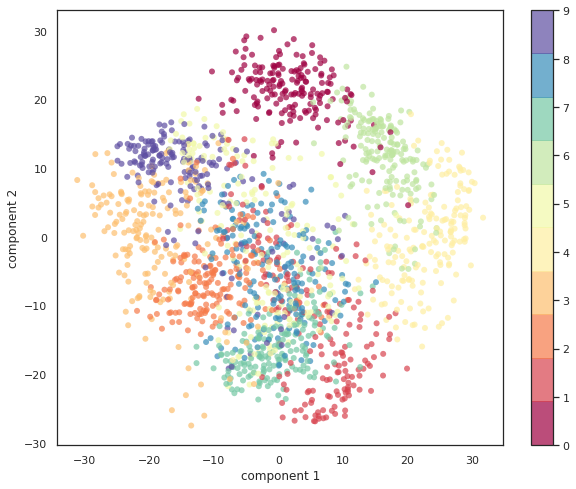

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
mappable = ax.scatter(projected[:, 0], projected[:, 1], 
            c=digits.target, 
            edgecolor='none', 
            alpha=0.7, 
            cmap=plt.cm.get_cmap('Spectral', 10))
_ = ax.set_xlabel('component 1')
_ = ax.set_ylabel('component 2')
fig.colorbar(mappable, ax=ax);

## Visualize the digits

In [33]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10), 
                             subplot_kw={'xticks':[], 'yticks':[]}, 
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap='binary', interpolation='nearest', clim=(0, 16))

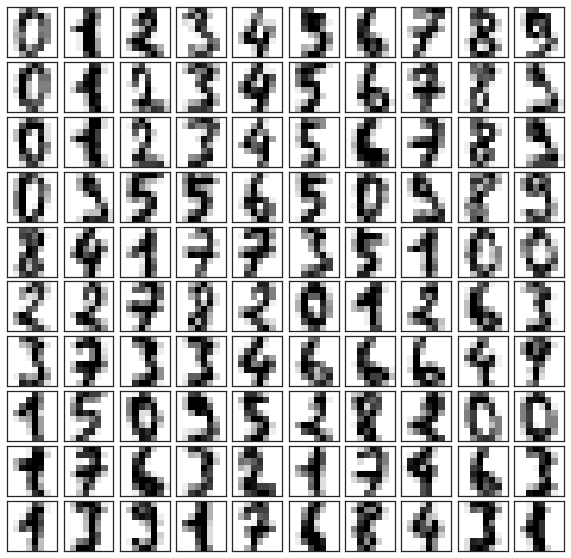

In [34]:
plot_digits(digits.data)

## Create a Noisy Dataset

numpy.random.normal(loc=0.0, scale=1.0, size=None) -- draw random samples from a normal (Gaussian) distribution
loc - Mean of the distribution
scale - Standard deviation (spread or “width”) of the distribution

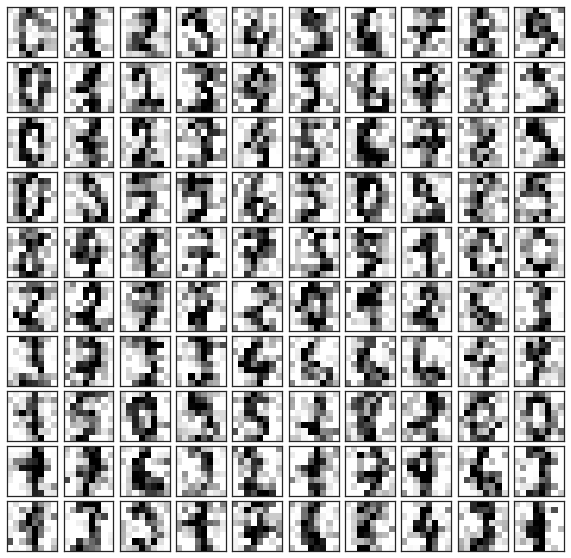

In [35]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

## Reconstruct filtered data

In [38]:
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

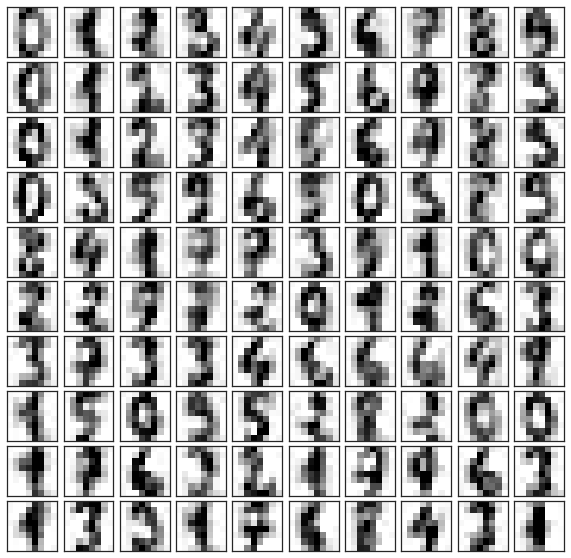

In [39]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

# EigenFaces

In [40]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [41]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

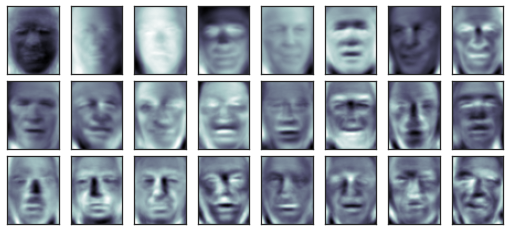

In [42]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4), 
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

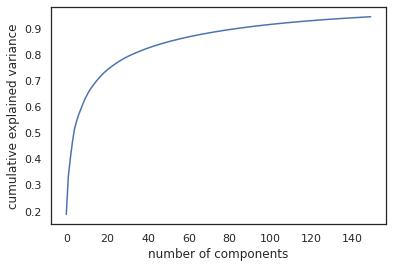

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

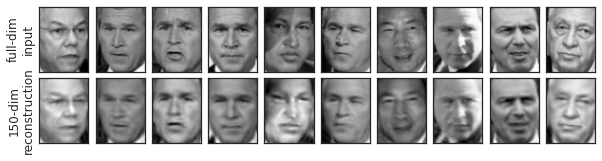

In [44]:
# Compute the components and projected faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# US Arrest Data

## Load the dataset

In [101]:
data_url = 'https://www.palmetto.clemson.edu/dsci/datasets/isl/USArrests.csv'
df = pd.read_csv(data_url, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [48]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Standarize the data

In [50]:
pd.DataFrame({'Mean': df.mean(), 'Variance': df.var()})

,Mean,Variance
Murder,7.788,18.970465
Assault,170.760,6945.165714
UrbanPop,65.540,209.518776
Rape,21.232,87.729159


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
df_scaled.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


## Compute PCA

In [58]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_scaled)
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

## Compute Loadings

In [59]:
pca_loadings = pd.DataFrame(pca.components_.T, index=df.columns, 
                            columns=['V{}'.format(i+1) for i in range(len(pca.components_))])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


## Compute Projections (Scores)

In [62]:
df_scores = pd.DataFrame(pca.transform(df_scaled), 
                         columns=['PC{}'.format(i+1) for i in range(len(pca.components_))],
                         index=df.index)
df_scores.head()                                                                                                                                                     

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [ ]:
## Plot Projects and Loading Vectors

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2, color='black', shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

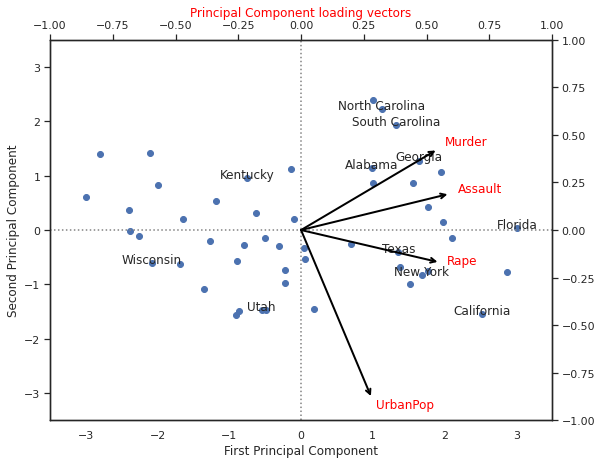

In [100]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

ax1.scatter(df_scores.PC1, df_scores.PC2)

# Plot Principal Components 1 and 2
#for i in df_scores.index:
for i in ['Alabama', 'California',  'Florida', 'Georgia', 'New York', 'Kentucky',
          'North Carolina', 'South Carolina', 'Wisconsin', 'Texas', 'Utah']:
    ax1.annotate(i, (df_scores.PC1.loc[i], df_scores.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='red')
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, pca_loadings.V2.loc[i]*a), color='red')
    
# Plot vectors
draw_vector((0,0), (pca_loadings.V1[0], pca_loadings.V2[0]), ax2)
draw_vector((0,0), (pca_loadings.V1[1], pca_loadings.V2[1]), ax2)
draw_vector((0,0), (pca_loadings.V1[2], pca_loadings.V2[2]), ax2)
draw_vector((0,0), (pca_loadings.V1[3], pca_loadings.V2[3]), ax2)

# Internet Advertisement Data

In [147]:
data_url = "https://www.palmetto.clemson.edu/dsci/datasets/uci/internet_ads/ad.data"
adData = pd.read_csv(data_url, sep=",", header = None, error_bad_lines=False)
adData.head()

/services/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [148]:
adData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB


In [169]:
X = adData.iloc[:, 0:1558]
Y = pd.factorize(adData.iloc[:, 1558])

In [150]:
"""
Replacing special characters in first 4 columns 
which are of type object
"""
for i in range(X.shape[1]):
    if X.dtypes[i] == 'object':
        X[i] = X[i].str.replace("?", 'nan').values.astype(float)
    else:
        X[i] = X[i].replace("?", 'nan').values.astype(float)        

In [151]:
# impute 'NaN' with the means
for i in range(0,1558):
    X[i] = X[i].fillna(X[i].mean())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,125.0,125.0,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57.0,468.0,8.2105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33.0,230.0,6.9696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
# Scaling the data sets

from sklearn import preprocessing
minmaxScaler = preprocessing.MinMaxScaler()
X_tran = pd.DataFrame(minmaxScaler.fit_transform(X))
X_tran.head() 

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,0.194053,0.194053,0.016642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.087637,0.730829,0.136820,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.050078,0.358372,0.116138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.092332,0.730829,0.129978,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.092332,0.730829,0.129978,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_tran = pd.DataFrame(scaler.fit_transform(X))
X_tran.head() 

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,1.305837,-0.274088,-0.567039,0.681953,-0.065482,-0.108281,-0.067791,-0.058017,-0.06309,-0.108281,...,-0.078338,-0.067791,-0.060606,-0.049454,-0.055309,-0.080285,-0.113908,-0.116624,-0.099274,-0.039079
1,-0.150373,2.824037,0.837047,0.681953,-0.065482,-0.108281,-0.067791,-0.058017,-0.06309,-0.108281,...,-0.078338,-0.067791,-0.060606,-0.049454,-0.055309,-0.080285,-0.113908,-0.116624,-0.099274,-0.039079
2,-0.664329,0.674318,0.595409,0.681953,-0.065482,-0.108281,-0.067791,-0.058017,-0.06309,-0.108281,...,-0.078338,-0.067791,-0.060606,-0.049454,-0.055309,-0.080285,-0.113908,-0.116624,-0.099274,-0.039079
3,-0.086128,2.824037,0.757111,0.681953,-0.065482,-0.108281,-0.067791,-0.058017,-0.06309,-0.108281,...,-0.078338,-0.067791,-0.060606,-0.049454,-0.055309,-0.080285,-0.113908,-0.116624,-0.099274,-0.039079
4,-0.086128,2.824037,0.757111,0.681953,-0.065482,-0.108281,-0.067791,-0.058017,-0.06309,-0.108281,...,-0.078338,-0.067791,-0.060606,-0.049454,-0.055309,-0.080285,-0.113908,-0.116624,-0.099274,-0.039079


In [160]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [171]:
Y

(array([0, 0, 0, ..., 1, 1, 1]), Index(['ad.', 'nonad.'], dtype='object'))

In [209]:
# Fitting a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
import time
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9796747967479674

In [161]:
from sklearn.decomposition import PCA
import time
t0 = time.time()
pca = PCA().fit(X_train)
t1 = time.time()
print("PCA fitting time:", round(t1-t0, 3), "s")

PCA fitting time: 2.002 s


In [162]:
pca.n_components_

1558

In [163]:
pca.explained_variance_ratio_

array([8.67095148e-01, 1.31075345e-01, 1.07013140e-03, ...,
       8.20988881e-33, 2.66407874e-35, 6.92093388e-36])

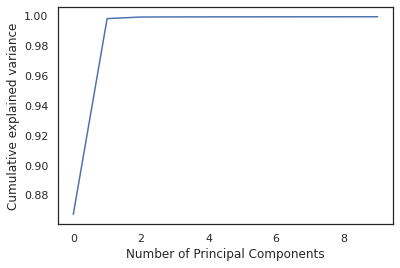

In [164]:
plt.plot(np.cumsum(pca.explained_variance_ratio_[:10]))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance');

In [165]:
np.cumsum(pca.explained_variance_ratio_) < 0.99

array([ True, False, False, ..., False, False, False])

In [210]:
# Fitting a Logistic Regression Model on the first 255 principal components

pca = PCA(n_components=255).fit(X_train)
X_train_tran = pca.transform(X_train)
X_test_tran = pca.transform(X_test)

clf = LogisticRegression(max_iter=2000)
clf.fit(X_train_tran, y_train)
clf.score(X_test_tran, y_test)

0.9735772357723578